# **LINEAR MODEL LAB 1**

**Ameyalli Contreras Sánchez - A01749075**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


## **Dataset "Animals"**

[Animals dataset](https://stat.ethz.ch/R-manual/R-patched/library/MASS/html/Animals.html)

Average brain and body weights for 28 species of land animals.

In [3]:
data = pd.read_csv("/content/Animals-1.csv", header=0, index_col=0)

In [4]:
data

body   brain
Mountain beaver       1.350     8.1
Cow                 465.000   423.0
Grey wolf            36.330   119.5
Goat                 27.660   115.0
Guinea pig            1.040     5.5
Dipliodocus       11700.000    50.0
Asian elephant     2547.000  4603.0
Donkey              187.100   419.0
Horse               521.000   655.0
Potar monkey         10.000   115.0
Cat                   3.300    25.6
Giraffe             529.000   680.0
Gorilla             207.000   406.0
Human                62.000  1320.0
African elephant   6654.000  5712.0
Triceratops        9400.000    70.0
Rhesus monkey         6.800   179.0
Kangaroo             35.000    56.0
Golden hamster        0.120     1.0
Mouse                 0.023     0.4
Rabbit                2.500    12.1
Sheep                55.500   175.0
Jaguar              100.000   157.0
Chimpanzee           52.160   440.0
Rat                   0.280     1.9
Brachiosaurus     87000.000   154.5
Mole                  0.122     3.0
Pig                 192.000   180.0

In [5]:
data.shape

(28, 2)

- We want to use a linear model to study the relation between the brain weight and the body weight

- Simple linear regression (one predictor):

$brain=\beta_0+\beta_1*body+\varepsilon$


### **Regression assumption on Y**

- Our model: $Y=\beta_0+\beta_1*x+\varepsilon$

- Given that we assume the errors $\varepsilon$ to have normal distribution $N(0,\sigma^2)$, we assume that also $Y$ are normally distributed.

- Check the assumption on $Y$

- If the response variable is not gaussian, a linear model should not be used.



In [6]:
# Separar X y Y
X = data["body"]
Y = data["brain"]

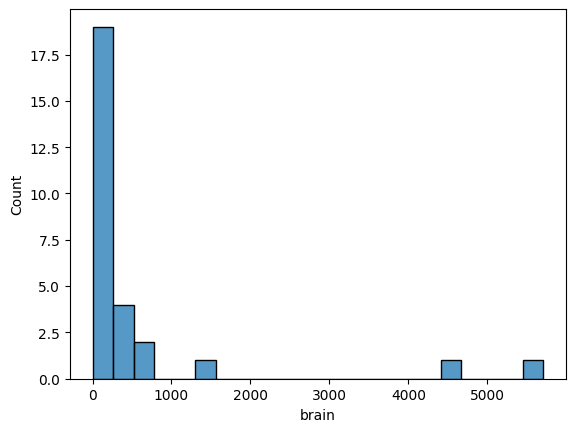

In [7]:
# Verificar si Y sigue una distribución normal
sns.histplot(Y)
plt.show()

In [8]:
# Prueba de normalidad jarque bera para Y
from scipy.stats import jarque_bera
jarque_bera(Y)
if jarque_bera(Y)[1] < 0.05:
    print("Y no sigue una distribución normal")
else:
    print("Y sigue una distribución normal")

Y no sigue una distribución normal


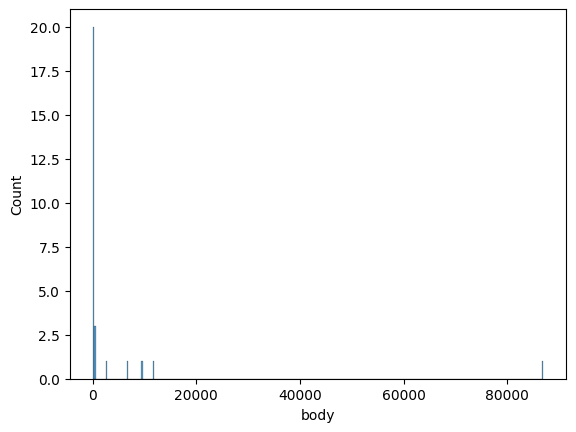

In [9]:
# Visualización de la distribución de la variable X
sns.histplot(X)
plt.show()

In [10]:
# Prueba jarque bera para X
jarque_bera(X)
if jarque_bera(X)[1] < 0.05:
    print("X no sigue una distribución normal")
else:
    print("X sigue una distribución normal")

X no sigue una distribución normal


In [11]:
# Revisar información y estadistica descriptiva del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Mountain beaver to Pig
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   body    28 non-null     float64
 1   brain   28 non-null     float64
dtypes: float64(2)
memory usage: 1.7+ KB


In [12]:
data.describe()

body        brain
count     28.000000    28.000000
mean    4278.438750   574.521429
std    16480.490379  1334.929191
min        0.023000     0.400000
25%        3.100000    22.225000
50%       53.830000   137.000000
75%      479.000000   420.000000
max    87000.000000  5712.000000

### **Transformations**

Apply the necessary transformations to Y and X (use log tranformation).

In [13]:
# Aplicar transformación logarítmica a Y y a X
data['body'] = data['body']*1000
data['body'] = np.log(data['body'])
data['brain'] = np.log(data['brain'])
data

body     brain
Mountain beaver    7.207860  2.091864
Cow               13.049793  6.047372
Grey wolf         10.500399  4.783316
Goat              10.227743  4.744932
Guinea pig         6.946976  1.704748
Dipliodocus       16.275099  3.912023
Asian elephant    14.750427  8.434464
Donkey            12.139399  6.037871
Horse             13.163505  6.484635
Potar monkey       9.210340  4.744932
Cat                8.101678  3.242592
Giraffe           13.178744  6.522093
Gorilla           12.240474  6.006353
Human             11.034890  7.185387
African elephant  15.710729  8.650325
Triceratops       16.056220  4.248495
Rhesus monkey      8.824678  5.187386
Kangaroo          10.463103  4.025352
Golden hamster     4.787492  0.000000
Mouse              3.135494 -0.916291
Rabbit             7.824046  2.493205
Sheep             10.924138  5.164786
Jaguar            11.512925  5.056246
Chimpanzee        10.862071  6.086775
Rat                5.634790  0.641854
Brachiosaurus     18.281419  5.040194
Mole               4.804021  1.098612
Pig               12.165251  5.192957

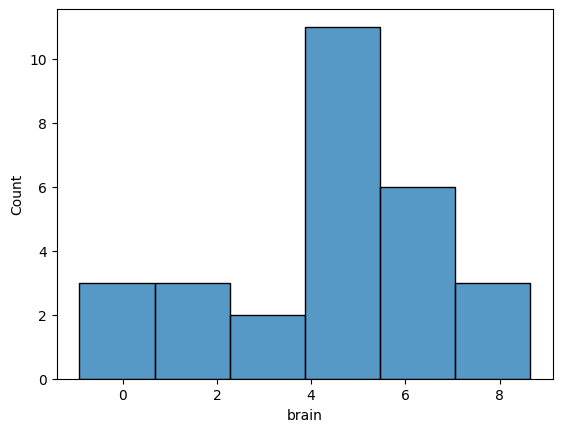

In [14]:
sns.histplot(data['brain'])
plt.show()

In [15]:
jarque_bera(data['brain'])
if jarque_bera(data['brain'])[1] < 0.05:
    print("Y no sigue una distribución normal")
else:
    print("Y sigue una distribución normal")

Y sigue una distribución normal


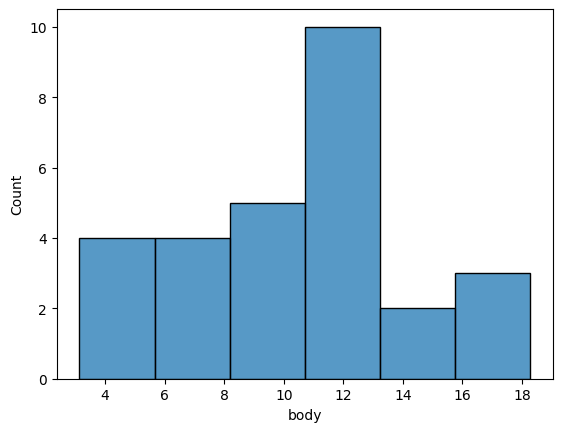

In [16]:
sns.histplot(data['body'])
plt.show()

In [17]:
jarque_bera(data['body'])
if jarque_bera(data['body'])[1] < 0.05:
    print("X no sigue una distribución normal")
else:
    print("X sigue una distribución normal")

X sigue una distribución normal


In [18]:
X = data['body']
Y = data['brain']

### **Outliers**

Detect the outliers using boxplots, histograms or scatter plots. Findout which are the animals corresponding to the outliers.

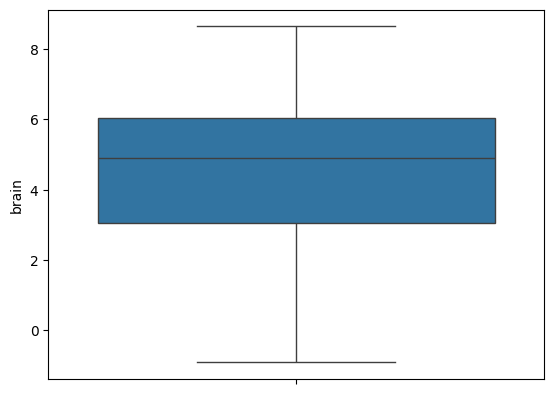

In [19]:
# Boxplot de Y con identificación de outliers
sns.boxplot(Y)
plt.show()

In [20]:
# Prueba IQR 1.5 para identificar outliers
Q1 = np.percentile(Y, 25)
Q3 = np.percentile(Y, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Y[(Y < lower_bound) | (Y > upper_bound)]
print(outliers)

Series([], Name: brain, dtype: float64)


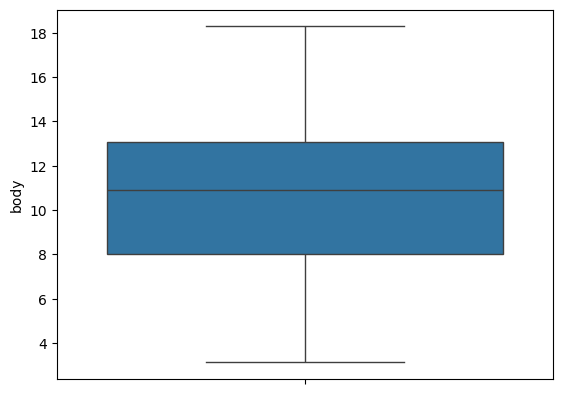

In [21]:
# Boxplor de X
sns.boxplot(X)
plt.show()

In [22]:
# Prueba IQR 1.5 para identificar outliers
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = X[(X < lower_bound) | (X > upper_bound)]
print(outliers)

Series([], Name: body, dtype: float64)


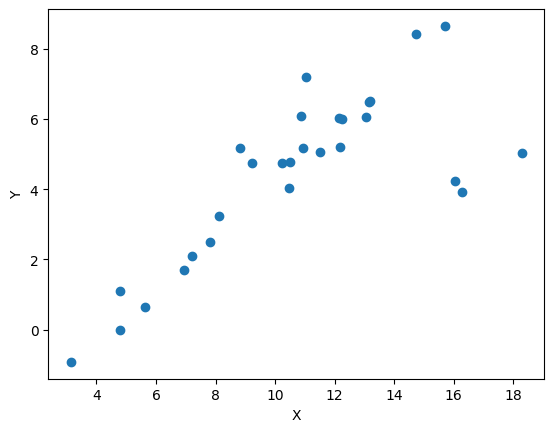

In [23]:
# Scatterplot de X_log vs Y_log
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## **Linear Regression Models**

### **Linear Regression 1**

Apply a simple linear regression using the model:

$\log(brain)=\beta_0+\beta_1*log(body)+\varepsilon $

In [24]:
# Definir la variable dependiente (y) y la variable independiente (x)
y = Y
x = X

# Agregar una constante (ordenada en el origen) a la variable independiente
x = sm.add_constant(x)

# Ajustar el modelo de regresión lineal
model_1 = sm.OLS(y, x).fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     40.26
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           1.02e-06
Time:                        00:59:08   Log-Likelihood:                -50.629
No. Observations:                  28   AIC:                             105.3
Df Residuals:                      26   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8713      0.884     -0.986      0.3

Denoting with $Y_i$ the observations and with $\hat{Y_i}$ the estimations, the residuals are:

$residuals=|Y_i-\hat{Y_i}|$


Draw an histogram of the residuals and a scatter plot of residuals vs fittedvalues. Do the plots suggest a proper residual behavior?

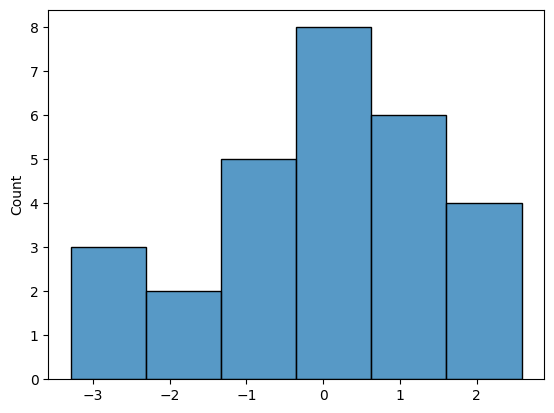

residuals sigue una distribución normal


In [25]:
# Histograma de residuals
residuals = model_1.resid
sns.histplot(residuals)
plt.show()
jarque_bera(residuals)
if jarque_bera(residuals)[1] < 0.05:
    print("residuals no sigue una distribución normal")
else:
    print("residuals sigue una distribución normal")

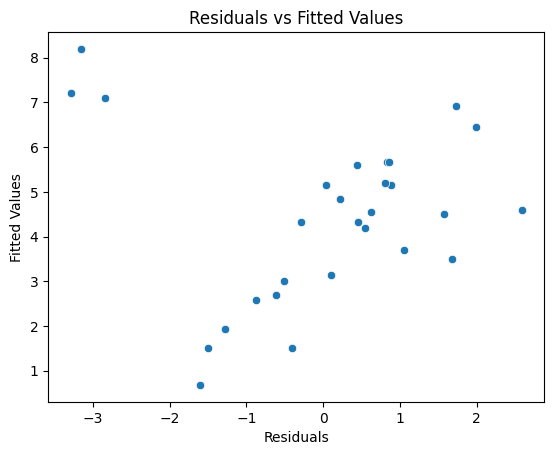

In [26]:
# Scatteroplot residuals vs fittedvalues
sns.scatterplot(x=residuals, y=model_1.fittedvalues)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Residuals')
plt.ylabel('Fitted Values')
plt.show()

Draw the regression line on the X,Y scatter plot.

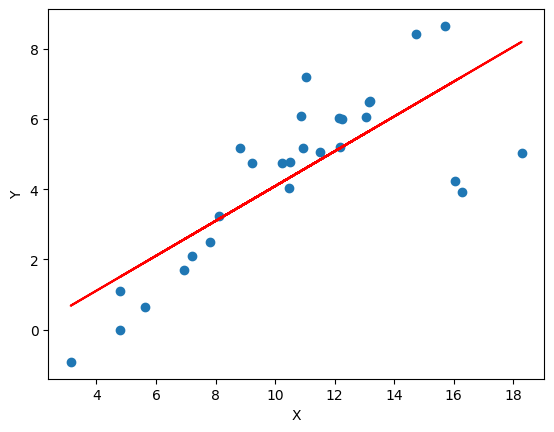

In [27]:
# X.Y scatterplot
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

# Plot regression line
fittedvals = model_1.fittedvalues
plt.plot(X, fittedvals, color='red')
plt.show()

### **Linear Regression 2**

#### **Dummy variables (Feature engineering)**

Should I treat dinosaurs independently? One can make the dataset more interesting introducing dummy variables, one for each type of dinosaurs.

Create four dummy variables: one for Triceratops, one for Dipliodocus, one for Brachiosaurus and one for dinosaur in general.


In [28]:
# Dummy variables
triceratops = np.where(data.index == 'Triceratops', 1, 0)
dipliodocus = np.where(data.index == 'Dipliodocus', 1, 0)
brachiosaurus = np.where(data.index == 'Brachiosaurus', 1, 0)

# Dinosaur binary feature
dinosaurs = data.index.isin(['Triceratops', 'Dipliodocus', 'Brachiosaurus'])
dinosaur = np.where(dinosaurs, 1, 0)

# Añadir columnas de dummy variables al dataset
data['Triceratops'] = triceratops
data['Dipliodocus'] = dipliodocus
data['Brachiosaurus'] = brachiosaurus
data['Dino'] = dinosaur

X = data.drop(['brain'], axis=1)
Y = data['brain']

In [29]:
data.head(10)

body     brain  Triceratops  Dipliodocus  Brachiosaurus  \
Mountain beaver   7.207860  2.091864            0            0              0   
Cow              13.049793  6.047372            0            0              0   
Grey wolf        10.500399  4.783316            0            0              0   
Goat             10.227743  4.744932            0            0              0   
Guinea pig        6.946976  1.704748            0            0              0   
Dipliodocus      16.275099  3.912023            0            1              0   
Asian elephant   14.750427  8.434464            0            0              0   
Donkey           12.139399  6.037871            0            0              0   
Horse            13.163505  6.484635            0            0              0   
Potar monkey      9.210340  4.744932            0            0              0   

                 Dino  
Mountain beaver     0  
Cow                 0  
Grey wolf           0  
Goat                0  
Guinea pig          0  
Dipliodocus         1  
Asian elephant      0  
Donkey              0  
Horse               0  
Potar monkey        0

#### **Regression model with dummy variables**

- New model with extra predictors:

$log(brain)=\beta_0+\beta_1*log(body)+\beta_2*DummyT+\beta_3*DummyD+\beta_4*DummyB+\varepsilon$

- A different intercept if it is a dinosaur. Suppose the animal is a triceratop: the variable DummyT is equal to 1, DummyD=DummyB=0.

$\log(brain)=\beta_0+\beta_1*log(body)+\beta_2=$

$(\beta_0+\beta_2)+\beta_1*log(body)$

The intercept is $\beta_0$ when the animal is not a triceratop, while it's $\beta_0+\beta_2$ when the animal is a triceratop.

With this model we consider three different intercepts for the three dinosaurs.



In [30]:
# Multiple linear regression (Dummies)
y = data['brain']
x = data[['body', 'Triceratops', 'Dipliodocus', 'Brachiosaurus']]
x = sm.add_constant(x)
model_2 = sm.OLS(y, x).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     68.00
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           2.10e-12
Time:                        00:59:09   Log-Likelihood:                -28.004
No. Observations:                  28   AIC:                             66.01
Df Residuals:                      23   BIC:                             72.67
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.0460      0.477     -6.387

#### **Residuals**

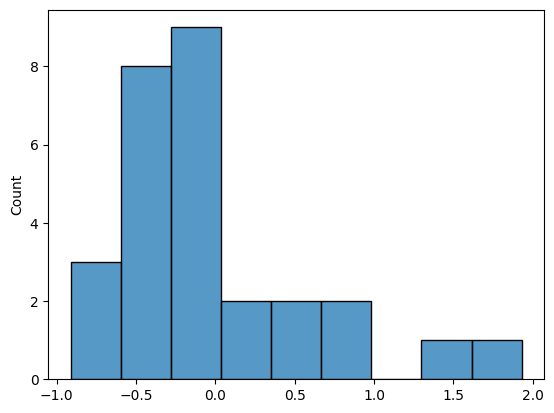

residuals no sigue una distribución normal


In [31]:
# Histograma de residuals
residuals = model_2.resid
sns.histplot(residuals)
plt.show()
jarque_bera(residuals)
if jarque_bera(residuals)[1] < 0.05:
    print("residuals no sigue una distribución normal")
else:
    print("residuals sigue una distribución normal")

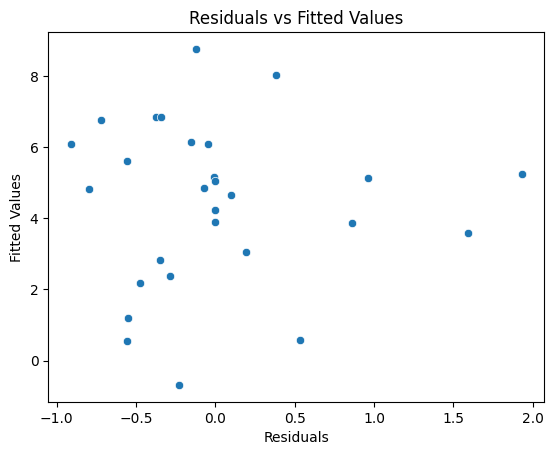

In [32]:
# Scatteroplot residuals vs fittedvalues
sns.scatterplot(x=residuals, y=model_2.fittedvalues)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Residuals')
plt.ylabel('Fitted Values')
plt.show()

### **Linear regression 3**

- Model 2: same rate of change, but different intercept for dinasaurs

 $log(brain)=\beta_0+\beta_1*log(body)+\beta_2*Dino+\varepsilon$

 For an animal different from a dinosaur, the intercept is $\beta_0$. For a dinosaur the intercept is $\beta_0+\beta_2$.




In [33]:
# Regresion lineal (body dino)
x = data[['body', 'Dino']]
x = sm.add_constant(x)
model_3 = sm.OLS(y, x).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     142.9
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           2.09e-14
Time:                        00:59:09   Log-Likelihood:                -28.446
No. Observations:                  28   AIC:                             62.89
Df Residuals:                      25   BIC:                             66.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0092      0.462     -6.511      0.0

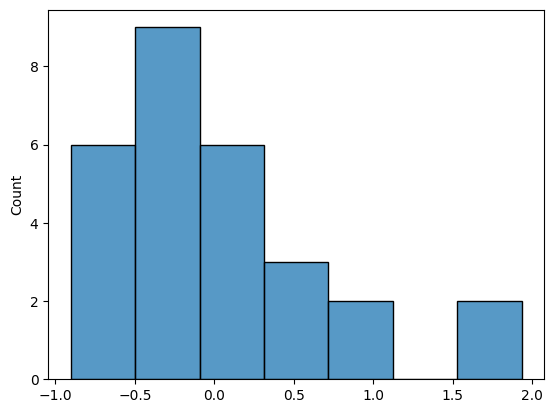

residuals no sigue una distribución normal


In [34]:
# Histograma de residuals
residuals = model_3.resid
sns.histplot(residuals)
plt.show()
jarque_bera(residuals)
if jarque_bera(residuals)[1] < 0.05:
    print("residuals no sigue una distribución normal")
else:
    print("residuals sigue una distribución normal")

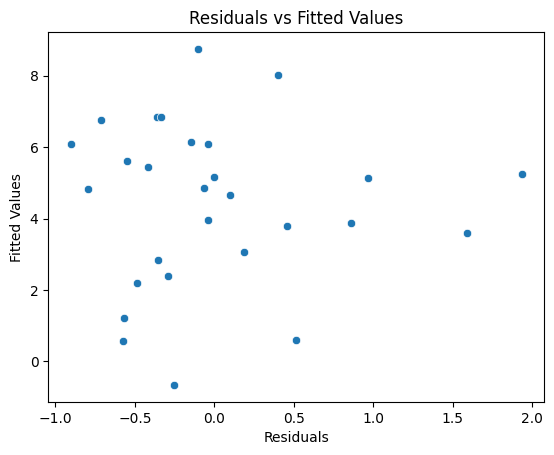

In [35]:
# Scatteroplot residuals vs fittedvalues
sns.scatterplot(x=residuals, y=model_3.fittedvalues)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Residuals')
plt.ylabel('Fitted Values')
plt.show()

### **Linear regression 4**

 Different intercept and slope for dinosaurs. We add the feature where we multiply the variables "Dino" and "log(body)".

 $log(brain)=\beta_0+\beta_1*log(body)+\beta_2*Dino+\beta_3*log(body)*Dino+\varepsilon$

For an animal other than a dinosaur, the intercept is $\beta_0$ and the slope $\beta_1$. For a dinosaur, the intercept is $\beta_0+\beta_2$ and the slope is $\beta_1+\beta_3$.

In [36]:
data['mult_Dino_bodylog'] = data['Dino'] * data['body']
data.head()

body     brain  Triceratops  Dipliodocus  Brachiosaurus  \
Mountain beaver   7.207860  2.091864            0            0              0   
Cow              13.049793  6.047372            0            0              0   
Grey wolf        10.500399  4.783316            0            0              0   
Goat             10.227743  4.744932            0            0              0   
Guinea pig        6.946976  1.704748            0            0              0   

                 Dino  mult_Dino_bodylog  
Mountain beaver     0                0.0  
Cow                 0                0.0  
Grey wolf           0                0.0  
Goat                0                0.0  
Guinea pig          0                0.0

In [37]:
# Regresión lineal (body Dino mult)
y = data['brain']
x = data[['body', 'Dino', 'mult_Dino_bodylog']]
x = sm.add_constant(x)
model_4 = sm.OLS(y, x).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     93.82
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           2.15e-13
Time:                        00:59:09   Log-Likelihood:                -28.113
No. Observations:                  28   AIC:                             64.23
Df Residuals:                      24   BIC:                             69.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.0460      0.46

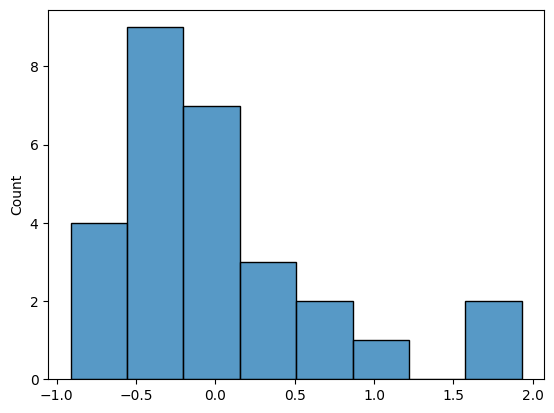

residuals no sigue una distribución normal


In [38]:
# Histograma de residuals
residuals = model_4.resid
sns.histplot(residuals)
plt.show()
jarque_bera(residuals)
if jarque_bera(residuals)[1] < 0.05:
    print("residuals no sigue una distribución normal")
else:
    print("residuals sigue una distribución normal")

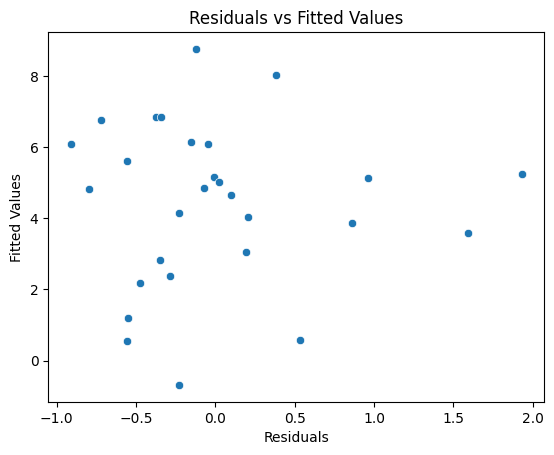

In [39]:
# Scatteroplot residuals vs fittedvalues
sns.scatterplot(x=residuals, y=model_4.fittedvalues)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Residuals')
plt.ylabel('Fitted Values')
plt.show()

## **ANOVA**

In [40]:
# Prueba ANOVA para comparar modelos del menos complejo al más complejo
anova_table = sm.stats.anova_lm(model_1, model_3, model_4, model_2)
print(anova_table)

   df_resid        ssr  df_diff    ss_diff          F        Pr(>F)
0      26.0  60.987988      0.0        NaN        NaN           NaN
1      25.0  12.505428      1.0  48.482560  92.024838  7.367435e-10
2      24.0  12.211564      1.0   0.293863   0.557782  4.624095e-01
3      23.0  12.117369      1.0   0.094196   0.178793  6.763398e-01


#### **Análisis de cada modelo**

**>> Modelo 1:**

Es el modelo base y se utiliza como punto de partida. Por lo tanto, no se evalúa su desempeño en la primera fila de la tabla. El valor df_resid (grados de libertad residuales) de 26.0 indica el número de observaciones menos el número de parámetros estimados en este modelo.

**>> Modelo 3 vs. Modelo 1:**

La adición de la variable dino en el Modelo 3 explica una parte significativa de la varianza residual del Modelo 1. Esto se observa en el valor F alto (92.024838) y un valor p (Pr(>F)) de 7.367435e−10 (que es 7.367×10^−10), el cual es mucho menor que un nivel de significancia típico de 0.05. Esta diferencia es altamente significativa, lo que sugiere que el Modelo 3 es significativamente superior al Modelo 1.

**>> Modelo 4 vs. Modelo 3:**

La adición de la variable mult_Dino_bodylog en el Modelo 4 no mejora significativamente el ajuste del modelo. El valor F es 0.557782 y el valor p es 0.4624095, que es mayor a 0.05. Esto indica que las variables adicionales en el Modelo 4 no contribuyen significativamente a explicar la variabilidad de los datos más allá de lo que ya se explica con el Modelo 3.

**>> Modelo 2 vs. Modelo 4:**

Similar a la comparación anterior, el valor F es 0.178793 y el valor p es 0.6763398, también mayor a 0.05. Esto indica que el Modelo 2 no ofrece una mejora significativa con respecto al Modelo 4 con la adición de las variables Triceratops, Dipliodocus y Brachiosaurus.

### **Which is the best model?**

**MODEL 3:**

$logbrain = b_0 + b_1 logbody + b_2 Dino$

$Pr(>F) = 7.367435e$^$ -10 < 0.05$ <-- El modelo tiene significancia

La comparación del Modelo 3 con el Modelo 1 muestra que la adición de la variable dino al modelado resulta en una reducción de la varianza residual altamente significativa (evidenciada por el bajo valor p).

Por lo tanto, el Modelo 3 representa el mejor equilibrio entre simplicidad y poder predictivo (capacidad para explicar la variabilidad de los datos). Lo que lo convierte en el mejor modelo de los 4 analizados.

## **Intervalo de confianza**

**Estimate of effect of the coefficients**

In [41]:
CI = [model_3.conf_int(0.05, cols=None)[0][1], model_3.conf_int(0.05, cols=None)[1][1]]
print(model_3.conf_int(0.05, cols=None)[0][1])
print(model_3.conf_int(0.05, cols=None)[1][1])

# Intervalo de confianza sobre el porcentaje de incremento
porcentaje_cambio = 15 # Incremento del 10% en el peso del animal

CI_addit = ((np.power(1+porcentaje_cambio/100, CI)-1)*100)
print('\nIntervalo de confianza para un incremento del', porcentaje_cambio, '%')
print(CI_addit, '\n\n')

0.6573460431553374
0.839759056986272

Intervalo de confianza para un incremento del 15 %
[ 9.62244523 12.45313341] 




/tmp/ipython-input-3569654963.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  CI = [model_3.conf_int(0.05, cols=None)[0][1], model_3.conf_int(0.05, cols=None)[1][1]]
/tmp/ipython-input-3569654963.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model_3.conf_int(0.05, cols=None)[0][1])
/tmp/ipython-input-3569654963.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model_3.conf_int(0.05, cols=None)[1][1])


## **Predicción de prueba**

**Animal seleccionado:** Highland cow

Imagenes:
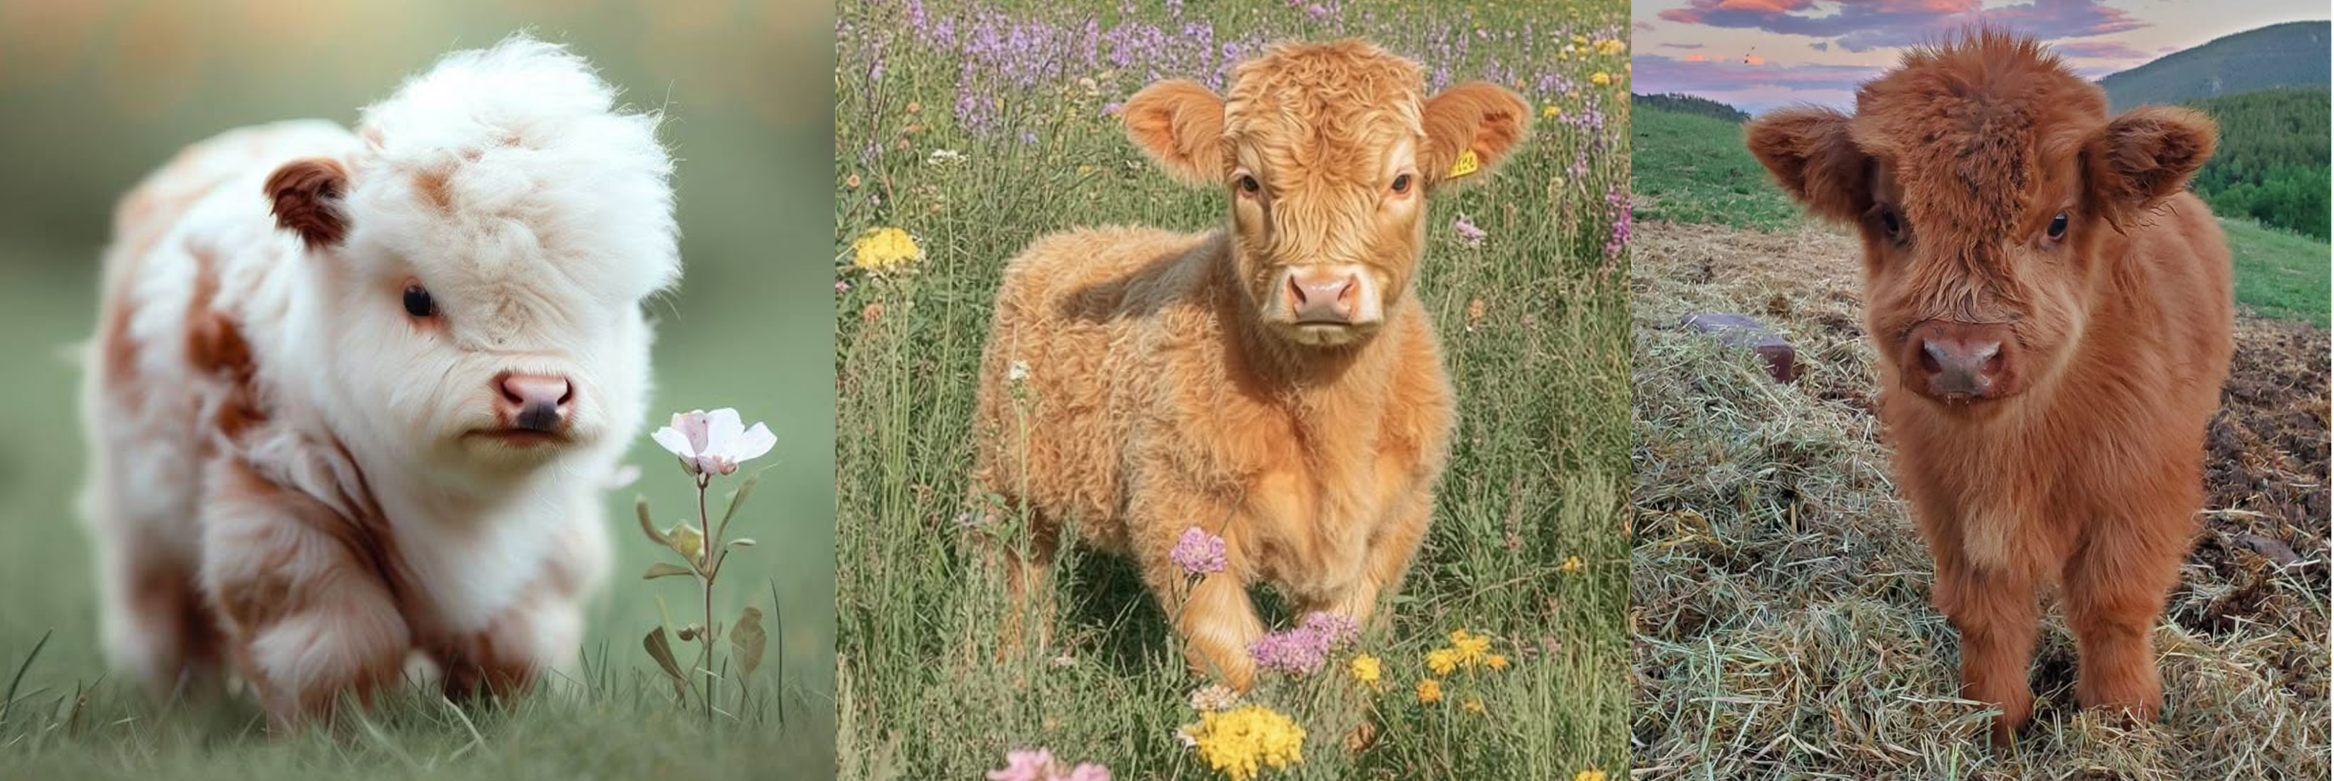

In [42]:
# Predecir el peso del cerebro de un animal basado en su peso corporal con el modelo_3
peso = 480
peso_Transformed = np.log(peso*1000)
dino = 0
cerebro = 492.14 # Peso real del cerebro en gramos

print("\n>>> VALOR REAL DEL CEREBRO <<<")
print("    > Valor real del cerebro: ", cerebro, " g")

brain_pred_log = -3.0092 + (0.7486 * peso_Transformed) + (-5.2194 * dino)
brain_pred_exp = np.exp(brain_pred_log)
print("\n>>> PREDICCIÓN MANUAL USANDO LOS COEFICIENTES DEL MODELO 3 <<<")
#print("    > Predicción con logaritmo:          ", brain_pred_log, " g")
print("    > Predicción transformación inversa: ", brain_pred_exp, " g")

brainpred = np.exp(model_3.predict(pd.DataFrame({'c': [1], 'body': [peso_Transformed], 'Dino': [dino]})))
print("\n>>> PREDICCIÓN USANDO EL MODELO 3 <<<")
print("    > Predicción con el Modelo 3:   ", brainpred)

print("\n>>> ERROR DE PREDICCIÓN <<<")
print("    > Error de predicción: ", abs(cerebro - brainpred))


>>> VALOR REAL DEL CEREBRO <<<
    > Valor real del cerebro:  492.14  g

>>> PREDICCIÓN MANUAL USANDO LOS COEFICIENTES DEL MODELO 3 <<<
    > Predicción transformación inversa:  883.2796715048178  g

>>> PREDICCIÓN USANDO EL MODELO 3 <<<
    > Predicción con el Modelo 3:    0    882.752432
dtype: float64

>>> ERROR DE PREDICCIÓN <<<
    > Error de predicción:  0    390.612432
dtype: float64


### **Intervalo de confianza de la predicción**

In [45]:
pred_cow = np.exp(model_3.get_prediction([1, np.log(peso), 0]).summary_frame(0.05))
pred_cow

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  5.013965  1.244282       3.196629       7.864486      1.091587   

   obs_ci_upper  
0     23.030541

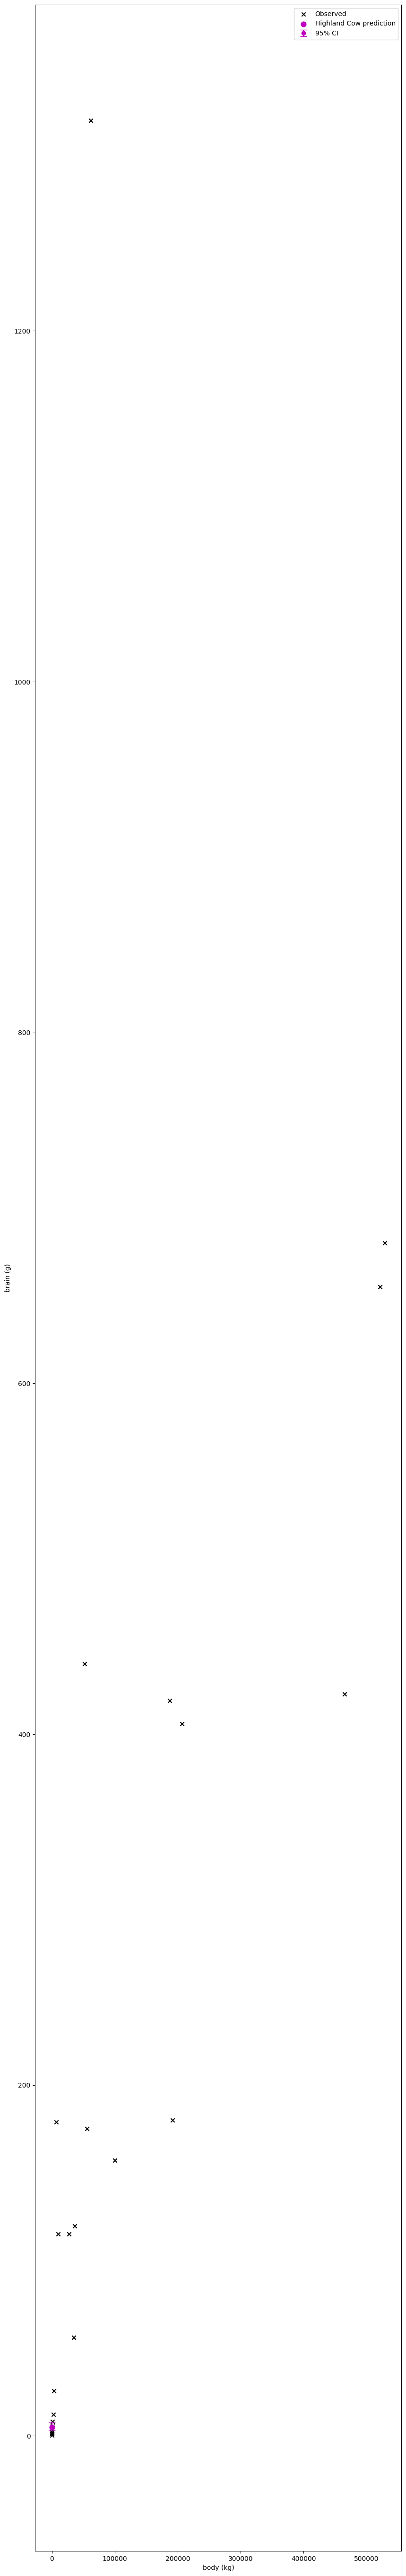

In [61]:
peso = 480

mean_val = pred_cow['mean'].iloc[0]
ci_lower = pred_cow['mean_ci_lower'].iloc[0]
ci_upper = pred_cow['mean_ci_upper'].iloc[0]

fig, ax = plt.subplots(figsize=(10,70))

# Datos observados
#data.drop(index=["Triceratops","Brachiosaurus","Dipliodocus","Asian elephant","African elephant"], inplace=True)
plt.scatter(np.exp(data['body']), np.exp(data['brain']), label='Observed', marker='x', color='black')

# Punto de la highland cow
plt.scatter(peso, mean_val, color='m', s=60,
            label='Highland Cow prediction', zorder=5)

# Intervalo de confianza (barra vertical)
plt.errorbar(peso, mean_val,
             yerr=[[mean_val - ci_lower], [ci_upper - mean_val]],
             fmt='o', color='m', capsize=5, label='95% CI')

plt.xlabel('body (kg)')
plt.ylabel('brain (g)')
plt.legend()
plt.show()